# Low rank compressibility

## A reminder of the Singular Value Decomposition

Let $A\in\mathbb{C}^{m\times n}$. Then $A$ has a singular value decomposition of the form

$$
A = U\Sigma V^H
$$

with $U\in\mathbb{C}^{m\times m}$, $V\in\mathbb{n\times n}$ unitary, that is $U^HU=I$ and $V^HV=I$.

The matrix $\Sigma\in\mathbb{R}^{m\times n}$ is a diagonal matrix with diagonal elements

$\sigma_1\geq \sigma_2\dots \geq \sigma_r > 0$. Here $r$ is the rank of the matrix. From now on we assume
that $r = \min\{m, n\}$.

## Low-rank approximations

Let $A\in\mathbb{C}^{m\times n}$. If 

$$
M\approx CZ^H 
$$

for $C, Z\in\mathbb{C}^{m\times k}$ with $k\ll \min\{m, n\}$

we say that $A$ has a low-rank approximation of rank $k$.


### Why are low-rank approximations useful?

Let $A\in\mathbb{C}^{n\times n}$ and assume $A$ has a 
low-rank approximation $A=CZ^H$ of rank $k$.

$A$ has $\mathcal{O}(n^2)$ storage cost and also $\mathcal{O}(n^2)$
for a matvec (matrix-vector product).

$CZ^H$ has $\mathcal{O}(nk)$ storage cost and also $\mathcal{O}(nk)$
cost for a matvec.

*If k is independent of $n$ then the cost of the low-rank expansion
scales linearly in $n$*.


## The SVD is the best possible low-rank approximation

Let $A \in \mathbb{C}^{m\times n}$ with SVD $A=U\Sigma V^H$.

Then $A_k = \sum_{j=1}^k \sigma_j u_jv_j^H$ is the best possible
approximation to $A$ in the sense that

$$
\sigma_{k+1} = \|A - A_k\|_2 \leq \|A-F\|_2
$$

for every matrix $F\in\mathbb{C}^{m\times n}$ of rank at most $k$.

We will later learn about heuristic techniques to efficiently compute low-rank approximations
without relying on the expensive SVD.

## Low-Rank Compressibility of Green's functions.

Let $g(x, y) = \frac{1}{4\pi|x -y|}$ be the usual Laplace Green's function in three dimensions.

Let $Y\subset \mathbb{R}^3$ be a set of sources and $X\in\mathbb{R}^3$ be a set of targets. We assume that $X$ and $Y$ are well separated (we will make this more precise later).

Let $x_i\in X$ and $y_j\in Y$ with $i, j=1,\dots, N$. Denote by $G$ the matrix of interactions defined by

$$
g_{ij} = g(x_i, y_j).
$$

As long as $X$ and $Y$ are well separated $G$ can be well approximated by a low-rank matrix.

Text(0, 0.5, '$\\sigma_k$')

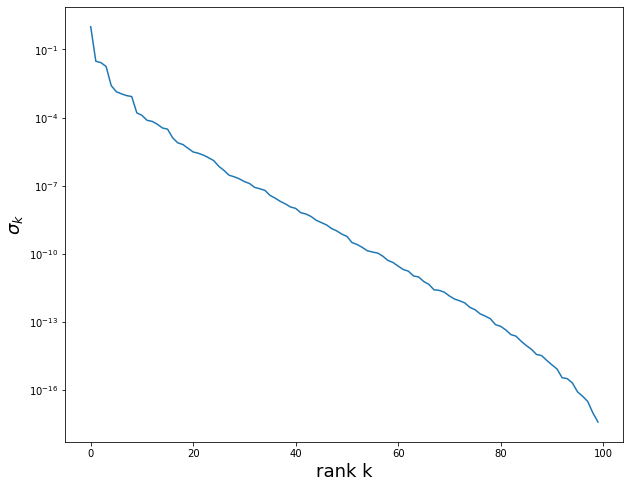

In [23]:
import numpy as np
from scipy.linalg import svdvals
from matplotlib import pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 8]

dist = 2.0
N = 100

targets = np.random.rand(3, N)
sources = np.random.rand(3, N) + dist * np.eye(3, 1)

G = np.zeros((N, N), dtype=np.float64)

for i in range(N):
    for j in range(N):
        G[i, j] = 1.0 / (4 * np.pi * np.linalg.norm(targets[:, i] - sources[:, j]))

s = svdvals(G)

plt.semilogy(s / s[0])
plt.xlabel('rank k', fontsize=18)
plt.ylabel('$\sigma_k$', fontsize=18)

We see that a rank of around $10$ is enough to approximate the original matrix $M$ with an accuracy of $10^{-5}$.

## Separable expansions

A separable expansion is an expression of the form

$$
g(x, y) = \sum_{j=1}^k\phi_j(x)\psi_j(y) + R_k(x, y)
$$

for $x\in X$ and $y\in Y$.

Here, the $\phi_j$ and $\psi_j$ are suitable chosen functions and $R_k$ is a remainder term.

A separable expansion is the continuous equivalent to a low-rank approximation. Let $G$ be the matrix of Green's function interactions.
Define 

$$
C_{ij} = \phi_j(x_i),\quad Z_{ij} = \overline{\psi_j(y_i)}.
$$

Then

$$
G = CZ^H + R_k(x_i, y_j).
$$

### Taylor series are separable expansions

Fix $x_0\in X$. Then the degree $m$ Taylor expansion is given as

$$
g(x, y) = \sum_{\alpha \in N^d, |\alpha|\leq m} (x- x_0)^{\alpha}\frac{1}{\alpha !}\partial_x^{\alpha}g(x_0, y) + R_k(x, y).
$$

The index $k$ is the number of terms in the Taylor expansion and given as $k=\left(\begin{array}{c}m+d\\ d\end{array}\right)$.

The parameter $k$ is the space dimension. In our case $d=3$.

An alternative to Taylor series is separable expansion by interpolation, or in the case of Laplace/Helmholtz type kernels spherical harmonics
type expansions.

No matter what type of expansion we choose, we need to ensure that the remainder term $R_k$ decays for increasing $k$.

## Admissibility conditions

To ensure rapid decay of the error term the sets $X$ and $Y$ need to be sufficiently far apart from each other.

If we can expand in $x$ or $y$ then the admissibility condition is that

$$
\min \{\text{diam}(X), \text{diam}(Y)\} \leq \eta\, \text{dist}(X, Y)
$$

for some sufficiently small $\eta> 0$.

This leads to an exponential error bound for the remainder term $R_k$ in the Taylor expansion of the form

$$
\| R_k\|_{\infty, X\times Y} = c_1(c_2\eta)^{m}
$$

for constants $c_1$ and $c_2$. Hence, for $\eta < c_2^{-1}$ the error will decay rapidly.

In practice, the choice of $\eta$ is usually less crucial if we choose algebraic low-rank approximations and not
analytic series expansions.

## Algebraic low-rank approximations

We have already seen that the SVD provides a low-rank approximation. However, while optimal the SVD is expensive to compute. In the following we discuss
a number of other low-rank approximation techniques that in practice provide nearly optimal results and are cheaper than the SVD.

### Pivoted QR decomposition

Let $A\in\mathbb{C}^{m\times n}$ and $r=\min\{m, n\}$. Then the pivoted QR decomposition of $A$ has the form

$$
AP = QR
$$

$P$ is a permutation matrix (exactly one element in each row/column is $1$, all others are zero.). $Q\in\mathbb{C}^{m\times r}$ has orthogonal columns, and $R\in\mathbb{C}^{r\times n}$ is upper triangular
with diagonal elements $r_ii$ sorted in decreasing order, that is $|r_{ii}|\geq |r_{i+1, i+1}|$.

The pivoted QR decomposition naturally gives rise to a low rank approximation. Choose $k<r$. Let $Q_k = Q[:, 1\dots k]$ and $R_k = R[1\dots k, :]$. We then have

$$
A\approx CZ^H
$$

with $C = Q_k$ and $Z = R_k^HP^H$.

### The interpolative decomposition

The original matrix $G$ encodes physical information, e.g. the Green's function interactions between source and target points. With the previous low-rank representations the matrices $C$ and $Z$ have no direct physical meaning. A solution is the interpolative decomposition. We partition the pivoted QR decomposition
as follows.

$$
\begin{aligned}
AP &= \begin{bmatrix}Q_k & \tilde{Q}\end{bmatrix}\begin{bmatrix}R_k[:, 1\dots k] & \tilde{R}\\ 0 & \hat{R}\end{bmatrix}\\
  &= Q_kR_k[:, 1\dots k]\begin{bmatrix}I & R_k[:, 1\dots k]^{-1}\tilde{R}\end{bmatrix} + \tilde{Q}\begin{bmatrix}0 & \hat{R}\end{bmatrix}
\end{aligned}
$$

The second term is discarded in the low-rank approximation. Also note that the product $Q_kR_k[:, 1\dots k]$ is identical to the first $k$ columns of $AP$. We hence obtain

$$
A = CZ^H
$$

with $C$ consisting of the first $k$ columns of $AP$ and $Z^H = \begin{bmatrix}I & R_k[:, 1\dots k]^{-1}\tilde{R}\end{bmatrix}P^H$.

The advantage of this decomposition is that the matrix $C$ now has physical meaning. With a little bit more linear algebra work we can derive a both sided interpolative decomposition of the form

$$
A = CA[J, J]Z^H,
$$

where $C\in\mathbb{C}^{m\times k}$, $Z\in\mathbb{C}^{n\times k}$ and $A[J, j]$ is a $k\times k$ submatrix of
$A$ obtained from an index set $J$.

### Randomized computation of the QR Decomposition

Computing an exact QR decomposition can be expensive for larger matrices. Randomized methods often give excellent approximations with a fraction of the cost of an exact QR decomposition.

The core of the idea is based on randomized range detection. Let $\Omega\subset\mathbb{C}^{n\times k'}$ whose entries are independently distributed Gaussian random numbers. Furthermore, $k' = k +p$, where $k$ is the desired rank and $p$ a small oversampling parameter.

We first compute $Y = A\Omega$ and then the QR decomposition $Y = QR$. This is cheap with a cost of $\mathcal{O}(m\times k')$.

An approximation to $A$ is now obtained by $A\approx QQ^HA$. To compute a pivoted QR decomposition of $A$ we compute the pivoted QR decomposition $Q^HAP = \hat{Q}R$ of $Q^HA$. Again, this is a cheap operation. The approximate pivoted QR decomposition of the original matrix $A$ is now obtained as

$$
AP \approx Q\hat{Q}R
$$

By discarding the $p$ last columns of $\hat{Q}$ and the corresponding $p$ last rows of $R$ this reduces to an approximate QR decomposition of rank $k$.

If the singular values of the matrix $A$ are rapidly decaying this is an excellent method to compute an approximate low-rank decomposition with very low computational cost.


### Adaptive Cross Approximation (ACA)

To compute a low-rank approximation with the previously discussed methods we need to at least be able to compute an approximate range of $A$ by multiplication with a random matrix $\Omega$. If $A$ represents Green's function interactions we can compute the matrix entries on the fly as we pass through the product. This reduces the memory cost. But we still have computational cost of $\mathcal{O}(m\times n)$.

Adaptive cross approximation is an algorithm that only needs to touch a subset of the rows and columns of $A$ and hence can give a low-rank approximation with much lower computational cost.

The idea is straight forward. Given the matrix $A\in\mathbb{C}^{\times n}$. Define $R_0:=A$. Choose a row $i_1$ and select $j_1$ such that $R_0[i_1, j_1]$ is the by magnitude largest element in row $i_1$. 

We now compute 

$$
R_1 := R_0 - \frac{1}{R_0[i_1, j_1]}R_0[:, j_1]R_0[i_1, :].
$$

By repeating this procedure with $R_1$ instead of $R_0$, and so on, we build up a low rank approximation 

$$
S_k = \sum_{\ell=1}^k \frac{1}{R_{\ell-1}[i_\ell, j_\ell]}R_{\ell-1}[:, j_\ell]R_{\ell-1}[i_\ell, :]
$$

such that $A = S_k + R_k$.

We are not discussing adaptive stopping criteria and the right choice of the row indices $i_k$ here. ACA is highly effective for kernel matrices arising from smooth kernels. However, it can fail if the underlying kernel function is not smooth (e.g. a double-layer kernel on over the boundary of a cube).
